In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit
from collections import Counter

In [3]:
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'lines.linewidth': 2})

#### Check automaton pattern

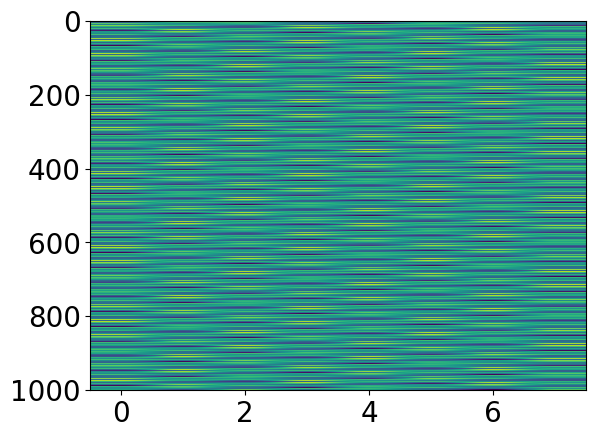

In [69]:
file_name = "../data/240214/rule30_1"
site_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nstep_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)

raw = np.loadtxt(file_name+'_data.csv',dtype=int,skiprows=1,delimiter=',')
stTraj = raw[:,0].reshape((len(nstep_l),len(site_l)))

plt.imshow(stTraj,aspect='auto')

In [64]:
trunc = 1001
stInt = stTraj[0:trunc,:].dot(1 << np.arange(stTraj.shape[-1] - 1, -1, -1))
print(stInt[0])
stCnt = Counter(stInt)
print(sorted(stCnt.items(), key=lambda pair: pair[1], reverse=False))

156
[(156, 1), (243, 25), (14, 25), (25, 25), (183, 25), (36, 25), (126, 25), (193, 25), (35, 25), (246, 25), (132, 25), (207, 25), (56, 25), (100, 25), (222, 25), (144, 25), (249, 25), (7, 25), (140, 25), (219, 25), (18, 25), (63, 25), (224, 25), (145, 25), (123, 25), (66, 25), (231, 25), (28, 25), (50, 25), (111, 25), (72, 25), (252, 25), (131, 25), (70, 25), (237, 25), (9, 25), (159, 25), (112, 25), (200, 25), (189, 25), (33, 25)]


#### Check automaton pattern for all initial states

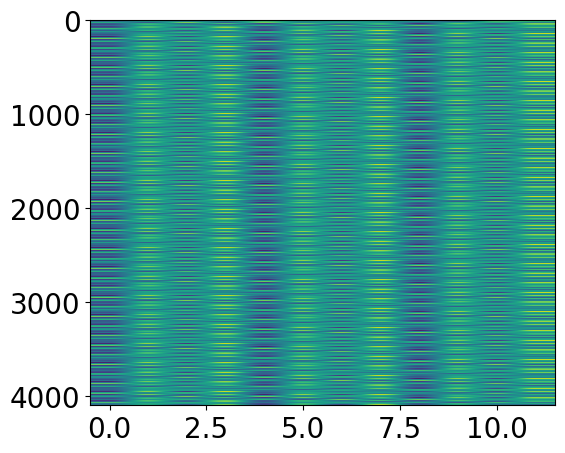

In [208]:
nqubits = 12
file_name = "../data/240214/rule30_%d"%(nqubits-6)
site_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nstep_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
init_l = np.loadtxt(file_name+'_scanz.csv',skiprows=1)

raw = np.loadtxt(file_name+'_data.csv',dtype=int,skiprows=1,delimiter=',')
stTraj = raw.reshape((len(init_l),len(nstep_l),len(site_l)))

plt.figure(figsize=(6,5))
plt.imshow(stTraj[34,:,:],aspect='auto')

[40. 40. 40. 40. 40. 40. 40. 41. 40.]


(array([3828.,    0.,    0.,    0.,    0.,   12.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,   12.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,  242.]),
 array([  39.  ,  120.14,  201.28,  282.42,  363.56,  444.7 ,  525.84,
         606.98,  688.12,  769.26,  850.4 ,  931.54, 1012.68, 1093.82,
        1174.96, 1256.1 , 1337.24, 1418.38, 1499.52, 1580.66, 1661.8 ,
        1742.94, 1824.08, 1905.22, 1986.36, 2067.5 , 2148.64, 2229.78,
        2310.92, 2392.06, 2473.2 , 2554.34, 2635.48, 2716.62, 2797.76,
        2878.9 , 2960.04, 3041.18, 3122.32, 3203.46, 3284.6 , 3365.74,
        3446.88, 3528.02, 3609.16, 3690.3 , 3771.44, 3852.58, 3933.72,
        4014.86, 4096.  ]),
 <BarContainer object of 50 artists>)

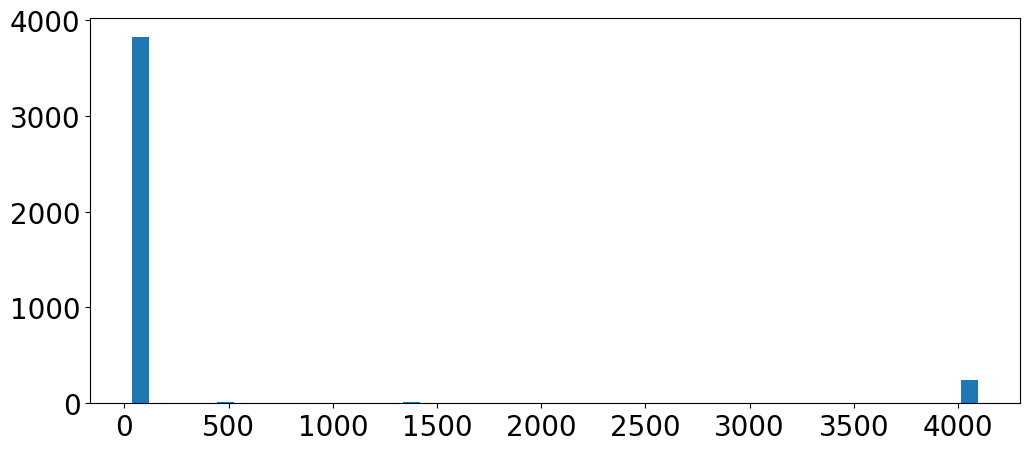

In [209]:
nbitstr = 2**nqubits
trunc = nbitstr+4
freq_l = np.zeros(nbitstr-2)
for i in range(0,nbitstr-2):
    stInt = stTraj[i+1,:,:].dot(1 << np.arange(stTraj.shape[-1] - 1, -1, -1))
    stCnt = Counter(stInt)
    stCntSorted = sorted(stCnt.items(), key=lambda pair: pair[1], reverse=True)
    freq_l[i] = stCntSorted[0][1]

print(freq_l[1:10])
plt.hist(freq_l,bins=50)

In [190]:
sorted([1,2,3],reverse=True)

[3, 2, 1]

#### Rule 54 Stag long time

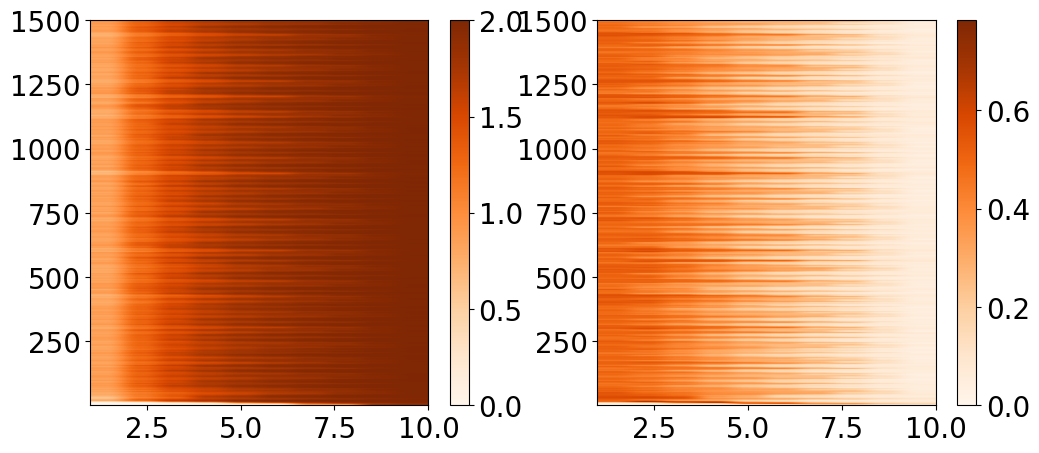

In [92]:
file_name = "../data/240214/240214_1"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)

raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(nmeas_l),len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(nmeas_l),len(nstep_l)))

plt.rcParams["figure.figsize"] = (12,5)
plt.subplot(1,2,1)
plt.imshow(S_ave_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(S_std_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()

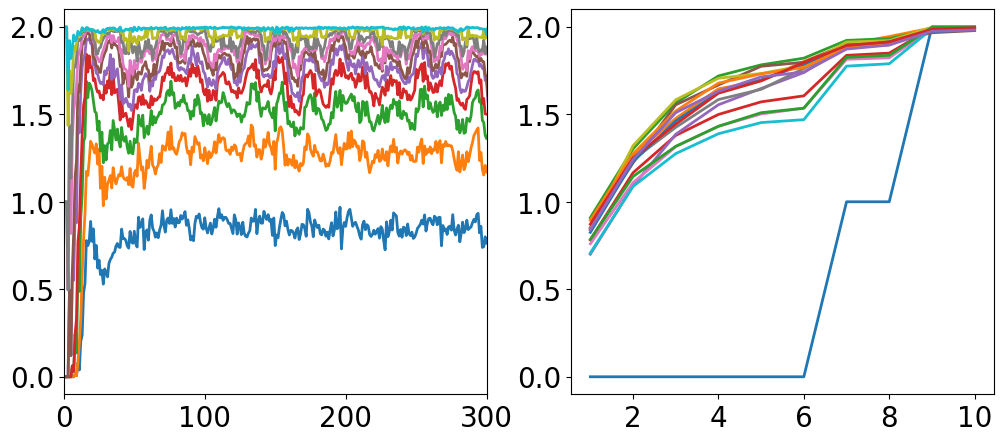

In [96]:
plt.rcParams["figure.figsize"] = (12,5)
plt.subplot(1,2,1)
for i in range(0,10,1):
    plt.plot(nstep_l,S_ave_arr[i,:])
    plt.xlim([0,300])
plt.subplot(1,2,2)
for i in range(0,1500,100):
    plt.plot(nmeas_l,S_ave_arr[:,i])

#### Rule 30 Long Time

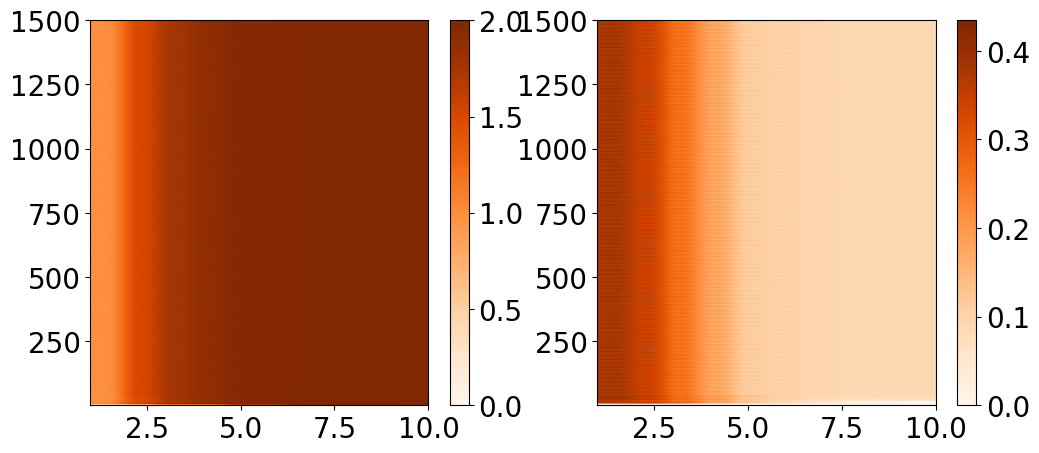

In [100]:
file_name = "../data/240214/240214_2"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)

raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(nmeas_l),len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(nmeas_l),len(nstep_l)))

plt.rcParams["figure.figsize"] = (12,5)
plt.subplot(1,2,1)
plt.imshow(S_ave_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(S_std_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()

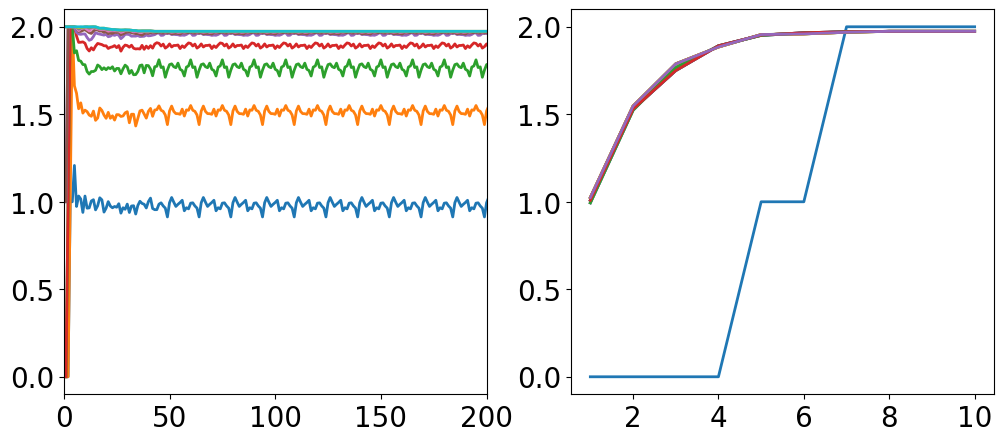

In [105]:
plt.rcParams["figure.figsize"] = (12,5)
plt.subplot(1,2,1)
for i in range(0,10,1):
    plt.plot(nstep_l,S_ave_arr[i,:])
    plt.xlim([0,200])
plt.subplot(1,2,2)
for i in range(0,1500,100):
    plt.plot(nmeas_l,S_ave_arr[:,i])

3-8

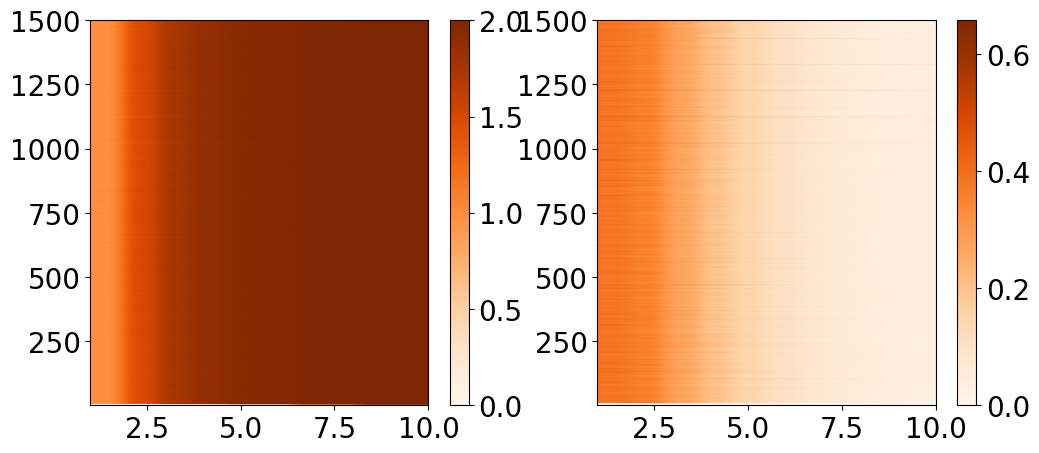

In [101]:
file_name = "../data/240214/240214_6"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
 
raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(nmeas_l),len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(nmeas_l),len(nstep_l)))

plt.rcParams["figure.figsize"] = (12,5)
plt.subplot(1,2,1)
plt.imshow(S_ave_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(S_std_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()

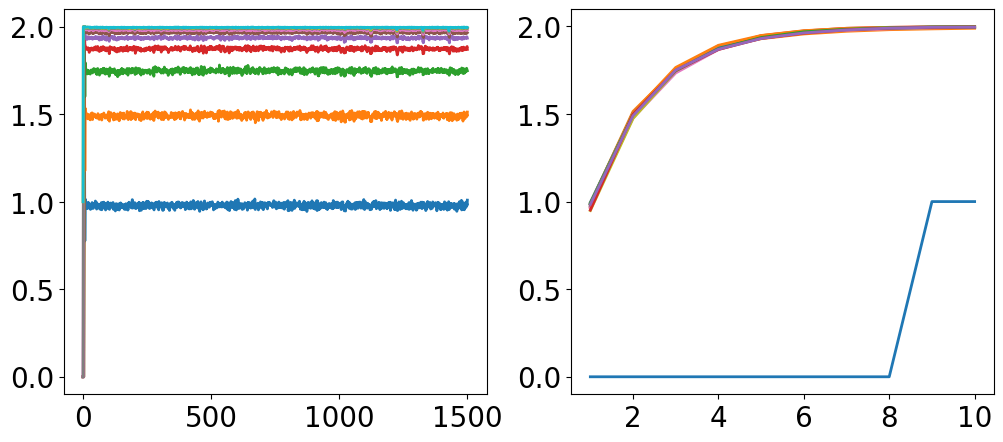

In [102]:
plt.rcParams["figure.figsize"] = (12,5)
plt.subplot(1,2,1)
for i in range(0,10,1):
    plt.plot(nstep_l,S_ave_arr[i,:])
    # plt.xlim([0,400])
plt.subplot(1,2,2)
for i in range(0,1500,100):
    plt.plot(nmeas_l,S_ave_arr[:,i])

#### Rule 30 Asites = 8-12 Bsites = 0 run long time
check global information survival
9-14

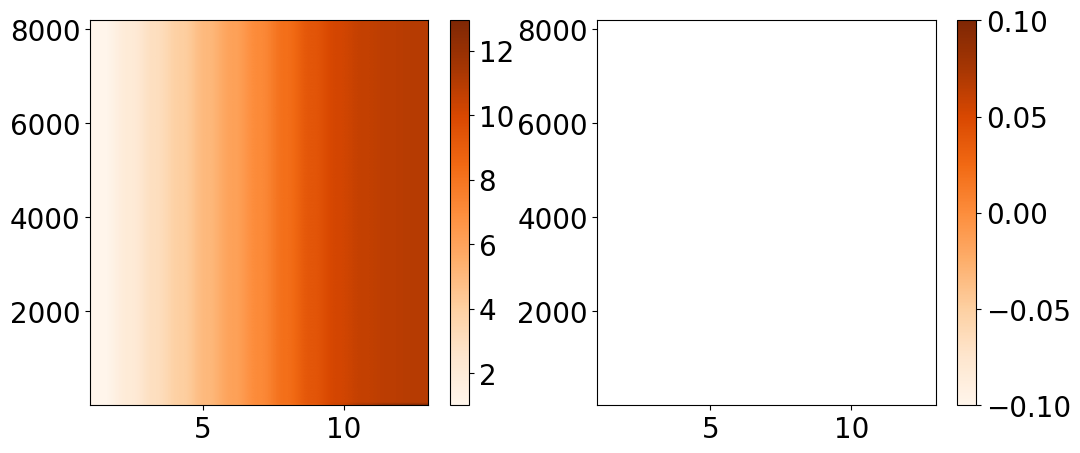

In [25]:
file_name = "../data/240214/240214_14"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
 
raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(nmeas_l),len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(nmeas_l),len(nstep_l)))

plt.rcParams["figure.figsize"] = (12,5)
plt.subplot(1,2,1)
plt.imshow(S_ave_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(S_std_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()

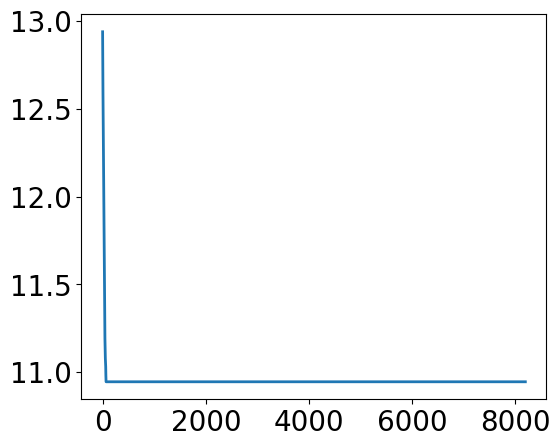

In [26]:
plt.figure(figsize=(6,5))
plt.plot(S_ave_arr[-1,:])
# plt.xlim([0,200])

#### Rule 54 Stag Asites = 8-12 Bsites = 0 run long time
check global information survival 
15-17

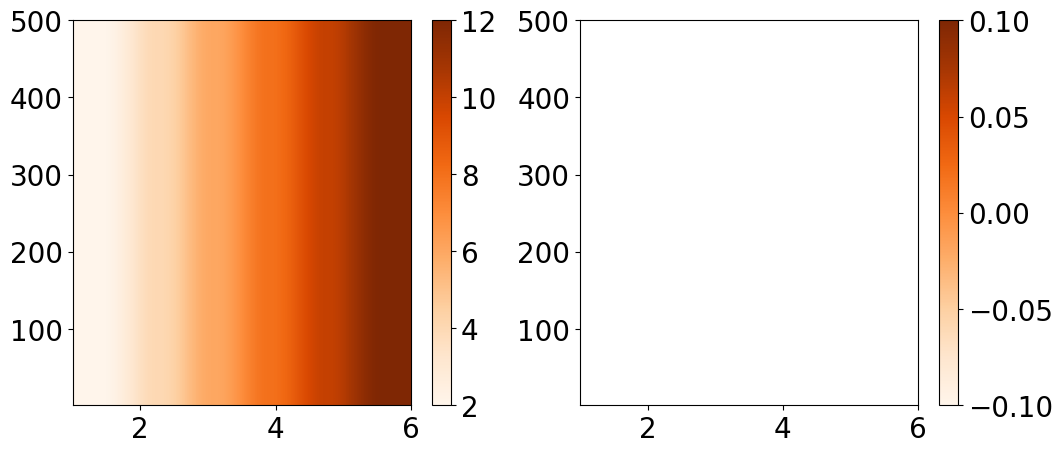

In [39]:
file_name = "../data/240214/240214_17"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
 
raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(nmeas_l),len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(nmeas_l),len(nstep_l)))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(S_ave_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(S_std_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()

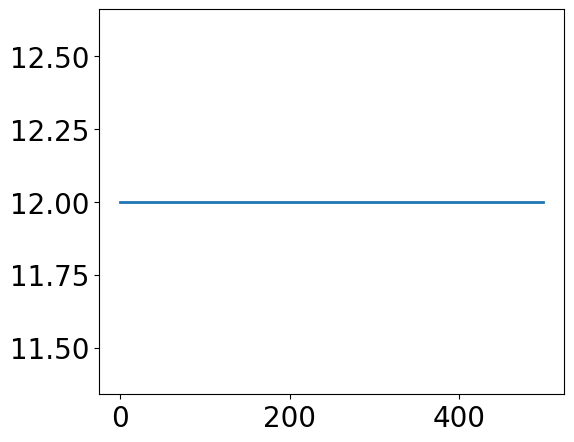

In [40]:
plt.figure(figsize=(6,5))
plt.plot(S_ave_arr[-1,:])
# plt.xlim([0,200])

#### Rule 54 Stag Asites = 1 Bsites = 100
do rule 54 again with the fixed code
18

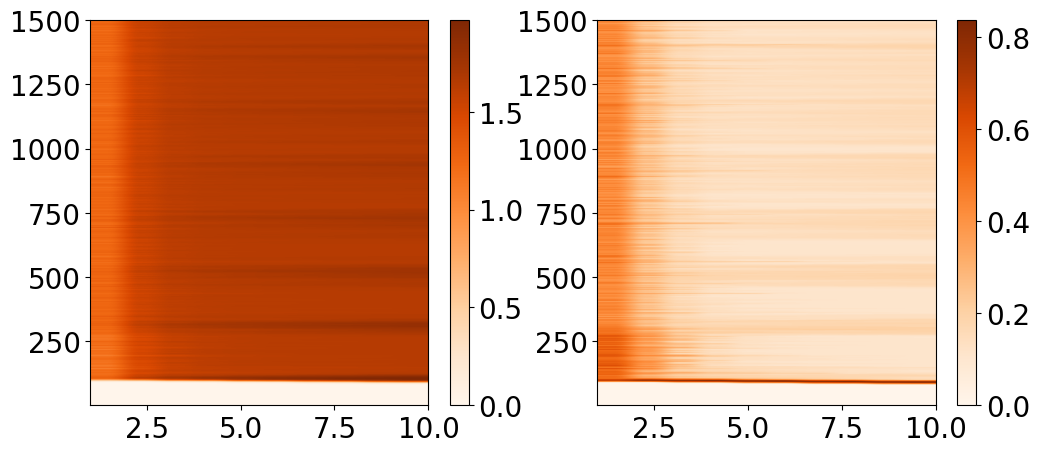

In [63]:
file_name = "../data/240214/240214_18"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
 
raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(nmeas_l),len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(nmeas_l),len(nstep_l)))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(S_ave_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(S_std_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()

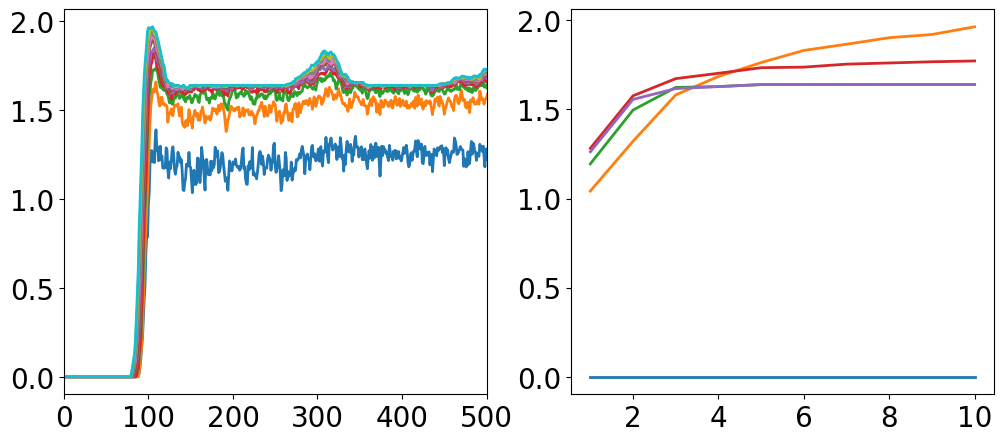

In [64]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
for i in range(0,10,1):
    plt.plot(nstep_l,S_ave_arr[i,:])
    plt.xlim([0,500])
plt.subplot(1,2,2)
for i in range(0,500,100):
    plt.plot(nmeas_l,S_ave_arr[:,i])

#### Rule 54 Stag Asites = 1 Bsites = 100
scan nmeas = 1:1:10, pertb = 0:0.5:0.05
19

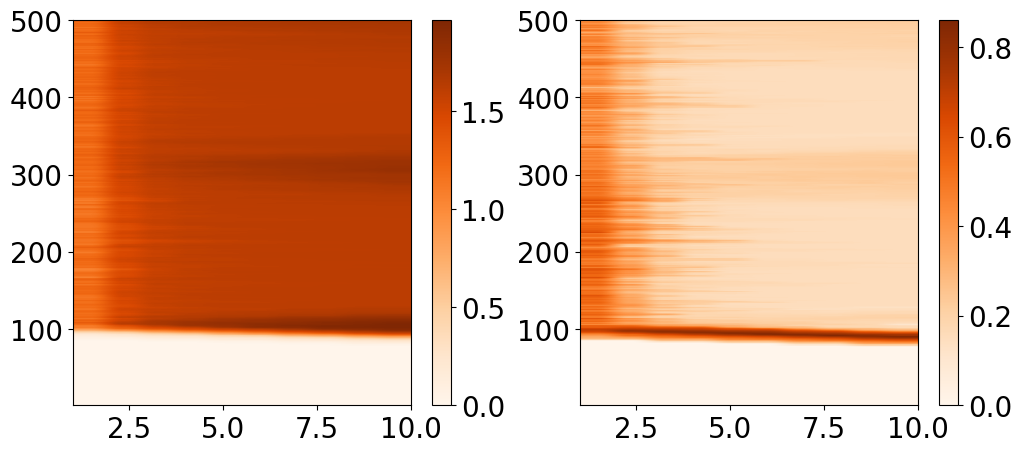

In [86]:
file_name = "../data/240214/240214_19"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
pertb_l = np.loadtxt(file_name+'_scanz.csv',skiprows=1)
 
raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(pertb_l),len(nmeas_l),len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(pertb_l),len(nmeas_l),len(nstep_l)))
# S_ave_arr = raw[:,0].reshape((1,len(nmeas_l),len(nstep_l)))
# S_std_arr = raw[:,1].reshape((1,len(nmeas_l),len(nstep_l)))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(S_ave_arr[0].T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(S_std_arr[0].T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()

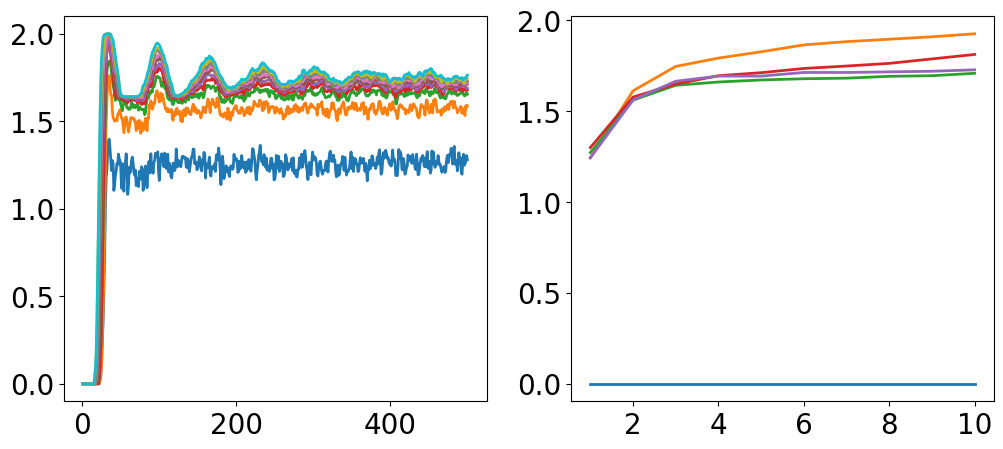

In [75]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
for i in range(0,10,1):
    plt.plot(nstep_l,S_ave_arr[0][i,:])
    # plt.xlim([0,200])
plt.subplot(1,2,2)
for i in range(0,500,100):
    plt.plot(nmeas_l,S_ave_arr[0][:,i])

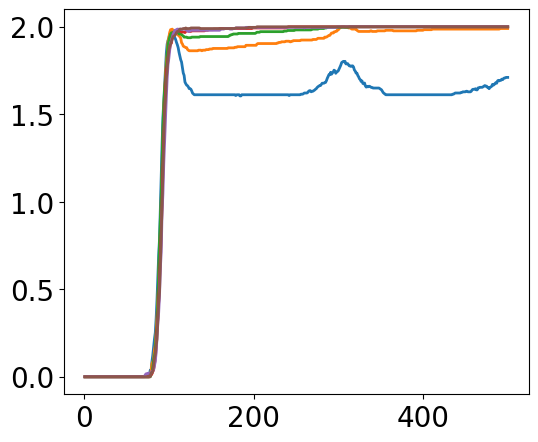

In [87]:
plt.figure(figsize=(6,5))
for i in range(0,len(pertb_l),1):
    plt.plot(nstep_l,S_ave_arr[i][-1,:])

#### Rule F
Asites = 4 Bsites = 0 check reversibility


Asites = 1 Bsites = 100 RndMeasStag F1 22


Asites = 1 Bsites = 100 RndMeasStag F2 24

Asites = 1 Bsites = 100 RndMeasStag 54 25

Asites = 1 Bsites = 100 RndMeasStag F3 30

Asites = 1 Bsites = 100 MeasStag 54 26

Asites = 1 Bsites = 100 MeasStag F1 27

Asites = 1 Bsites = 100 MeasStag F2 28

Asites = 1 Bsites = 100 MeasStag F3 29

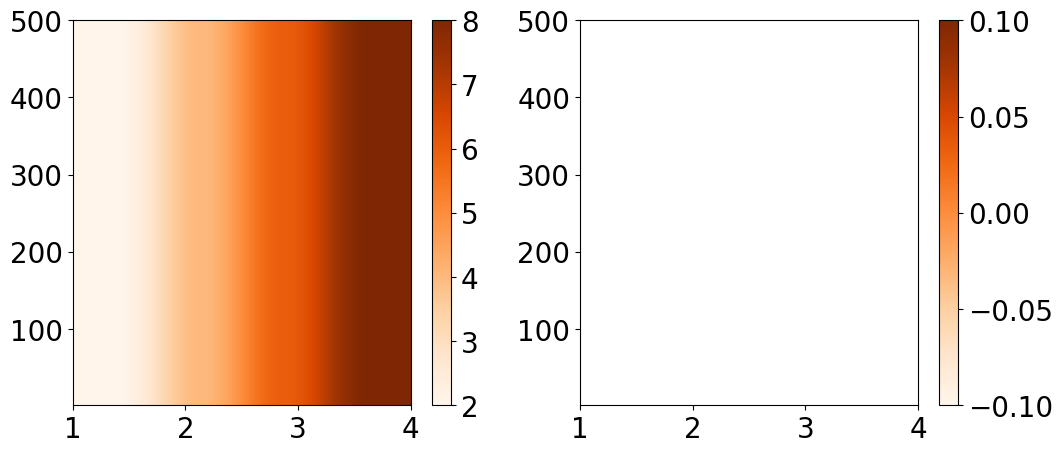

In [90]:
# corrupted
file_name = "../data/240214/240214_20"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
 
raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(nmeas_l),len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(nmeas_l),len(nstep_l)))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(S_ave_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(S_std_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()

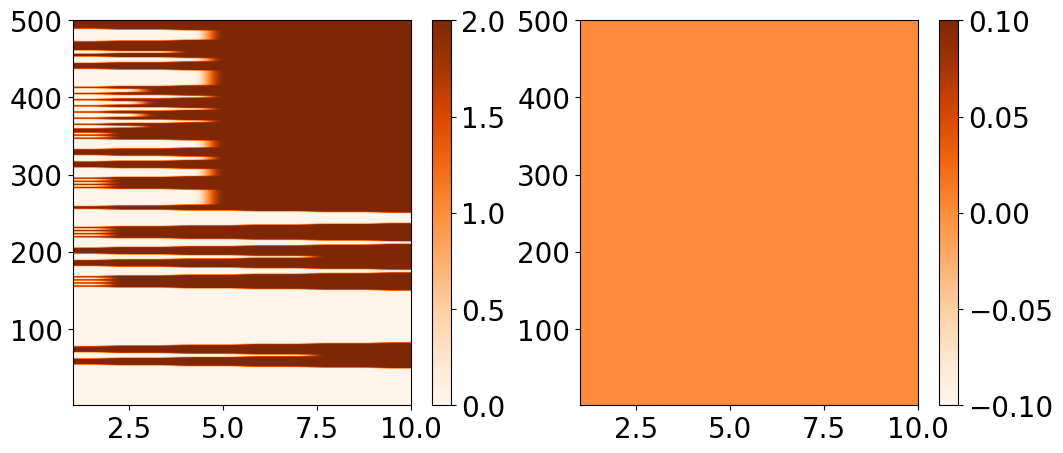

In [91]:
file_name = "../data/240214/240214_21"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
 
raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(nmeas_l),len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(nmeas_l),len(nstep_l)))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(S_ave_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(S_std_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()

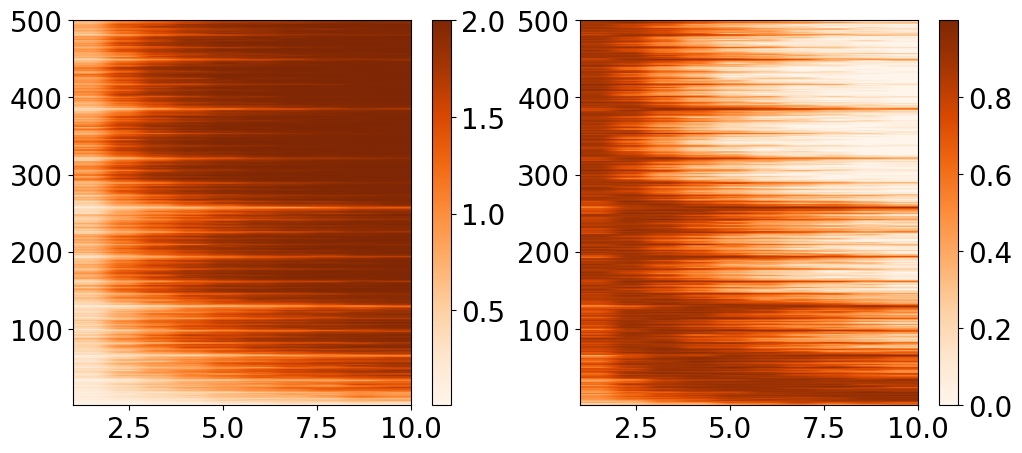

In [105]:
file_name = "../data/240214/240214_22"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
 
raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(nmeas_l),len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(nmeas_l),len(nstep_l)))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(S_ave_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(S_std_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()

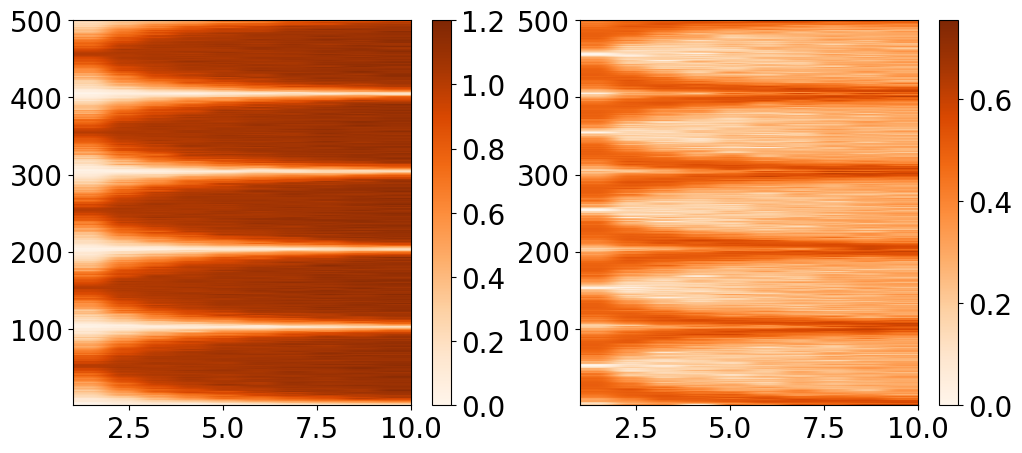

In [107]:
file_name = "../data/240214/240214_24"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
 
raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(nmeas_l),len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(nmeas_l),len(nstep_l)))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(S_ave_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(S_std_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()

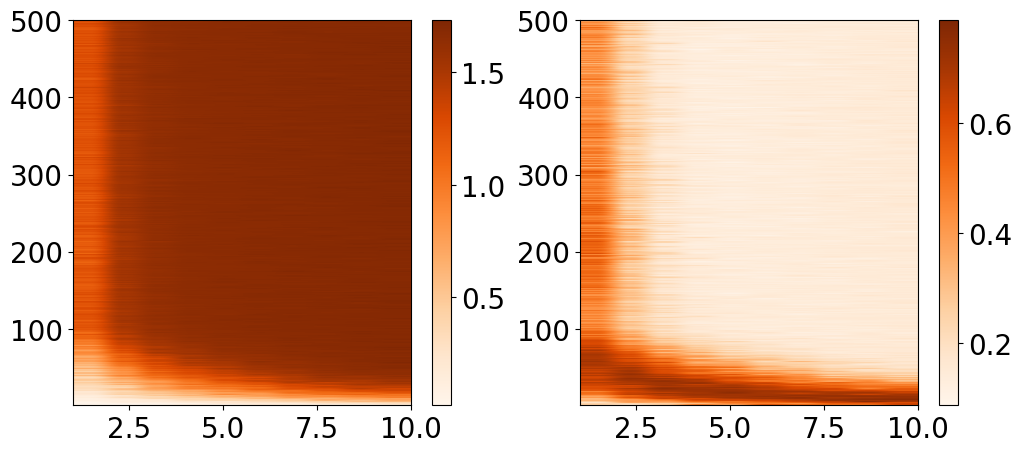

In [108]:
file_name = "../data/240214/240214_25"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
 
raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(nmeas_l),len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(nmeas_l),len(nstep_l)))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(S_ave_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(S_std_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()

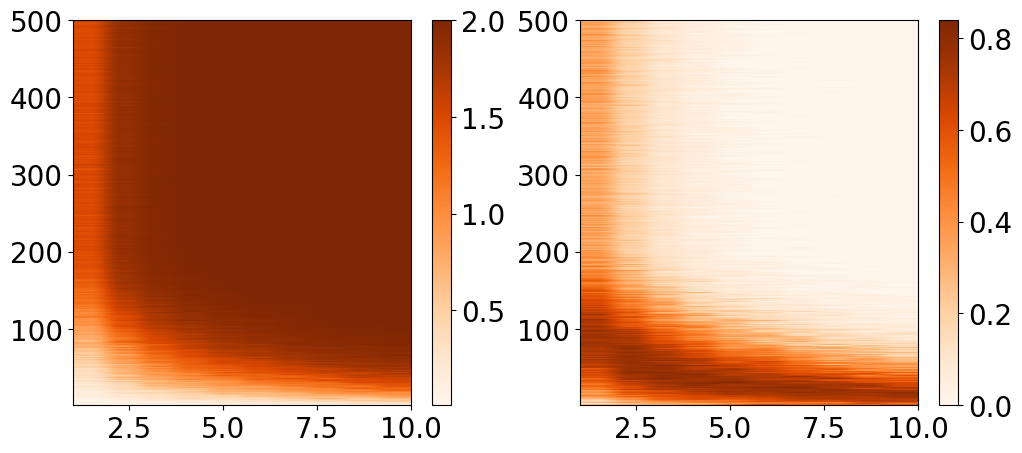

In [115]:
file_name = "../data/240214/240214_30"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
 
raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(nmeas_l),len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(nmeas_l),len(nstep_l)))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(S_ave_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(S_std_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()

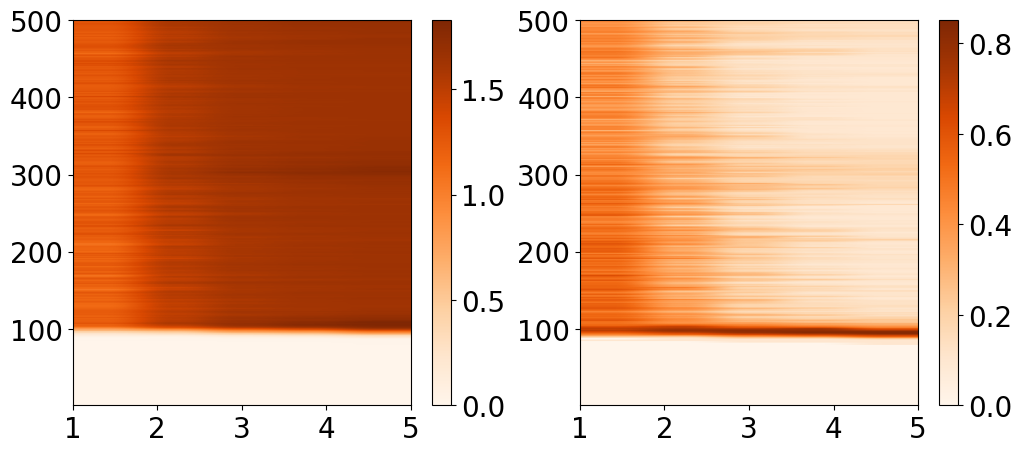

In [111]:
file_name = "../data/240214/240214_26"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
 
raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(nmeas_l),len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(nmeas_l),len(nstep_l)))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(S_ave_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(S_std_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()

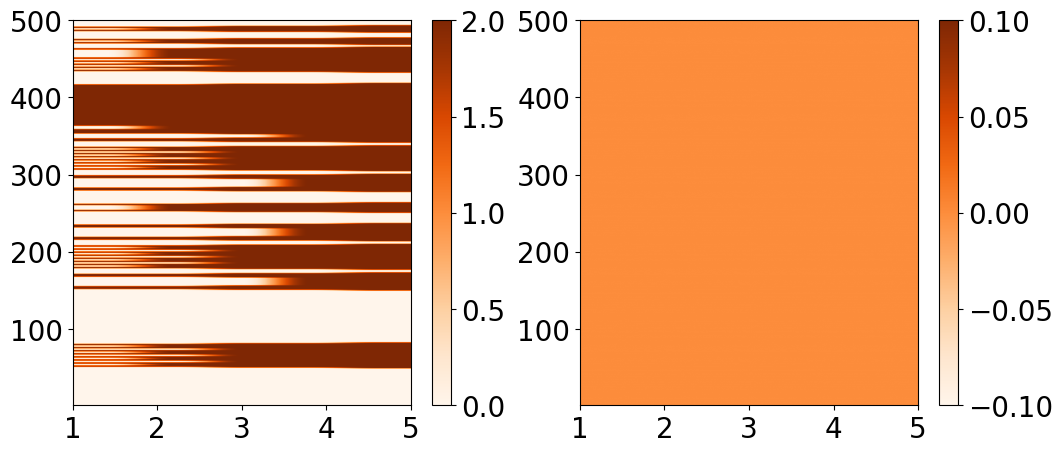

In [112]:
file_name = "../data/240214/240214_27"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
 
raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(nmeas_l),len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(nmeas_l),len(nstep_l)))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(S_ave_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(S_std_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()

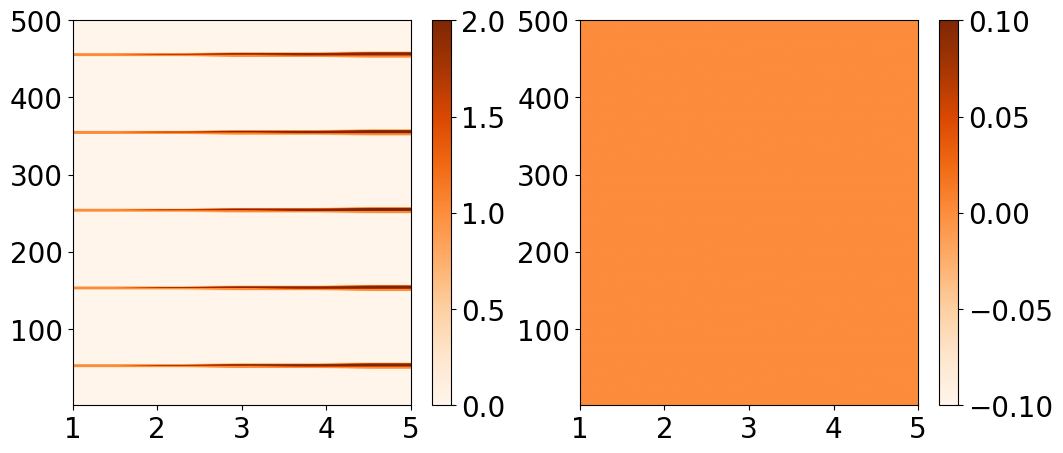

In [113]:
file_name = "../data/240214/240214_28"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
 
raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(nmeas_l),len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(nmeas_l),len(nstep_l)))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(S_ave_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(S_std_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()

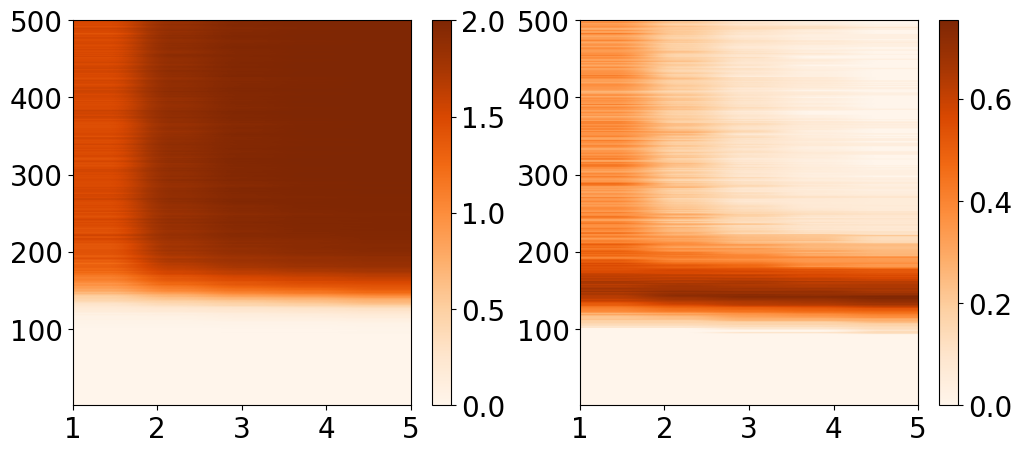

In [114]:
file_name = "../data/240214/240214_29"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
 
raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(nmeas_l),len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(nmeas_l),len(nstep_l)))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(S_ave_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(S_std_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()

#### Rule 30 Long time
Asites=1,Bsites= 23

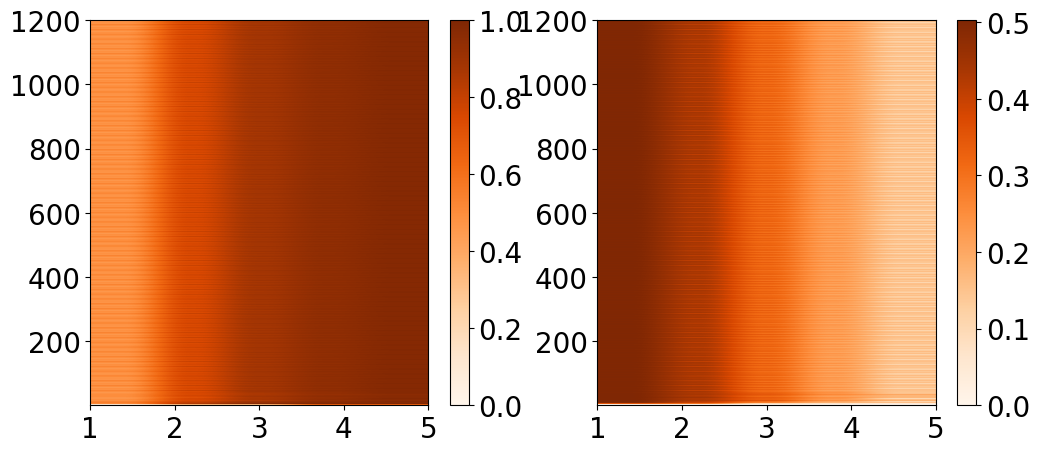

In [94]:
file_name = "../data/240214/240214_23"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
 
raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(nmeas_l),len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(nmeas_l),len(nstep_l)))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(S_ave_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(S_std_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()

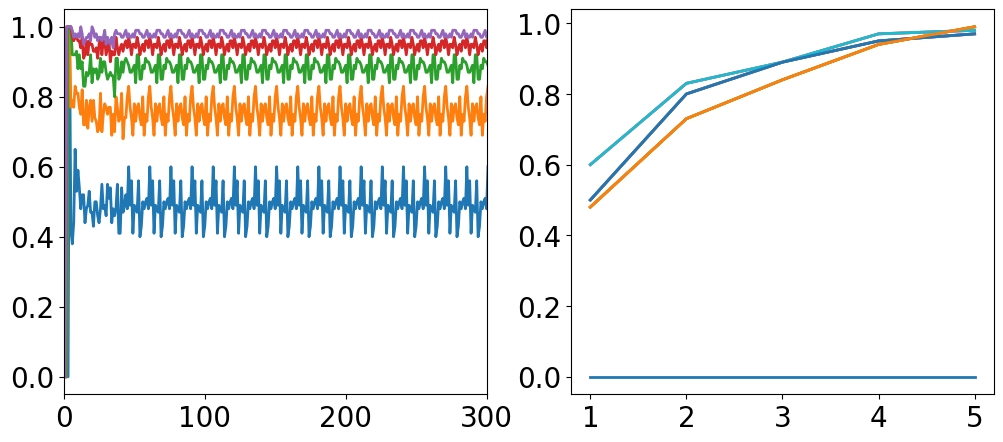

In [96]:
plt.rcParams["figure.figsize"] = (12,5)
plt.subplot(1,2,1)
for i in range(0,5,1):
    plt.plot(nstep_l,S_ave_arr[i,:])
    plt.xlim([0,300])
plt.subplot(1,2,2)
for i in range(0,1200,100):
    plt.plot(nmeas_l,S_ave_arr[:,i])

#### Rule 110
Asite = 5, Bsite = 100 30

Asite = 1, Bsite = 100 31

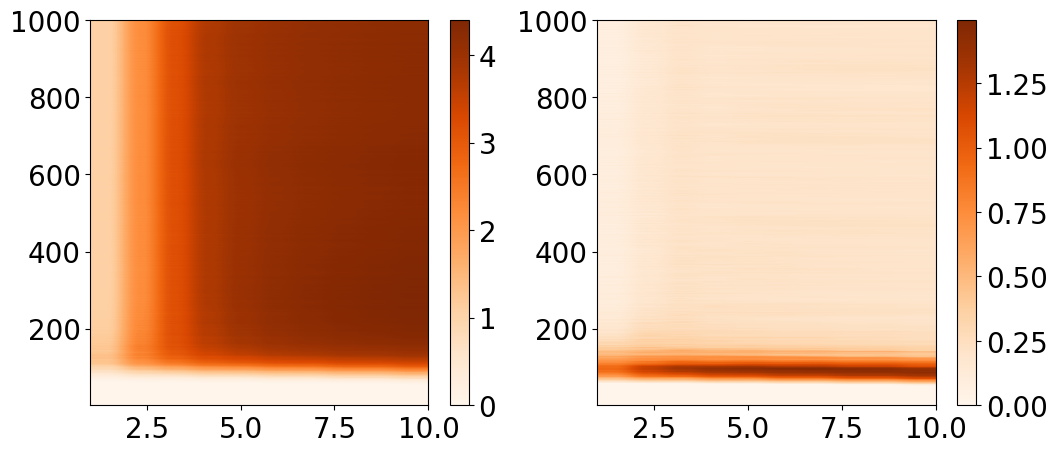

In [117]:
file_name = "../data/240214/240214_30"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
 
raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(nmeas_l),len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(nmeas_l),len(nstep_l)))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(S_ave_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(S_std_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()

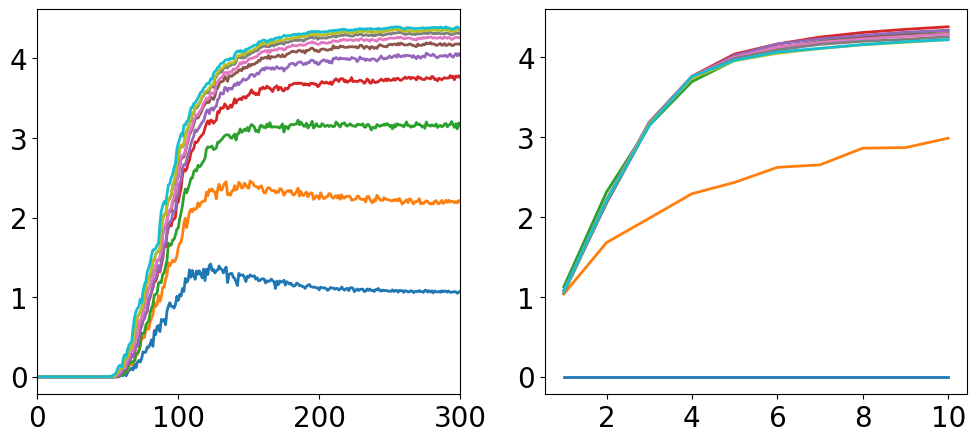

In [119]:
plt.rcParams["figure.figsize"] = (12,5)
plt.subplot(1,2,1)
for i in range(0,10,1):
    plt.plot(nstep_l,S_ave_arr[i,:])
    plt.xlim([0,300])
plt.subplot(1,2,2)
for i in range(0,1000,100):
    plt.plot(nmeas_l,S_ave_arr[:,i])

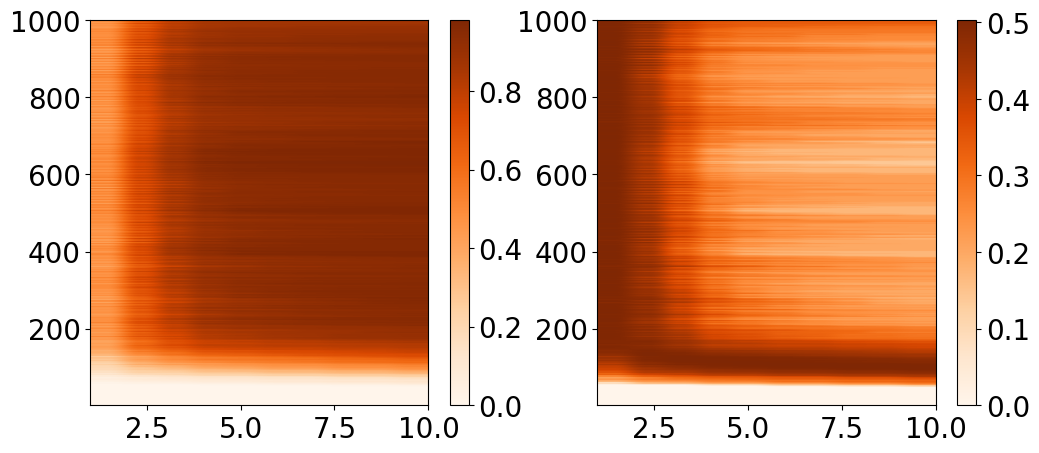

In [120]:
file_name = "../data/240214/240214_31"
nstep_l = np.loadtxt(file_name+'_scanx.csv',skiprows=1)
nmeas_l = np.loadtxt(file_name+'_scany.csv',skiprows=1)
 
raw = np.loadtxt(file_name+'_data.csv',skiprows=1,delimiter=',')
S_ave_arr = raw[:,0].reshape((len(nmeas_l),len(nstep_l)))
S_std_arr = raw[:,1].reshape((len(nmeas_l),len(nstep_l)))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(S_ave_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(S_std_arr.T[::-1,:],aspect="auto",cmap="Oranges",extent=[nmeas_l[0],nmeas_l[-1],nstep_l[0],nstep_l[-1]])
plt.colorbar()

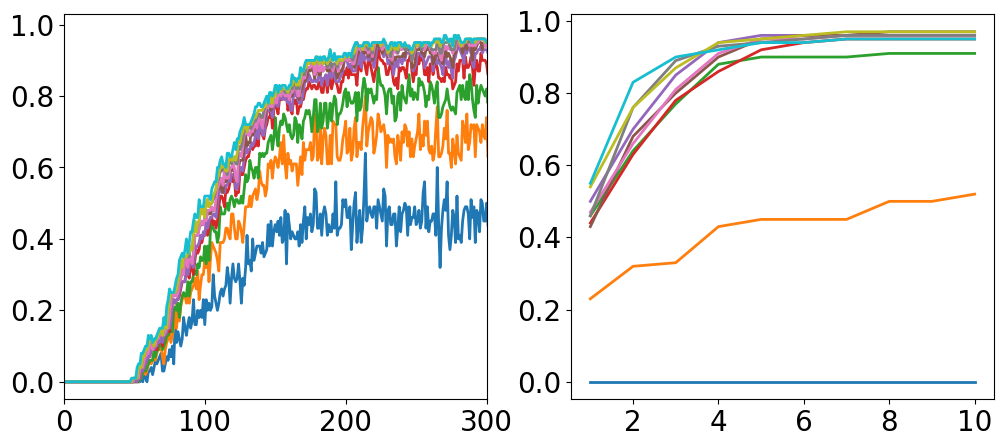

In [121]:
plt.rcParams["figure.figsize"] = (12,5)
plt.subplot(1,2,1)
for i in range(0,10,1):
    plt.plot(nstep_l,S_ave_arr[i,:])
    plt.xlim([0,300])
plt.subplot(1,2,2)
for i in range(0,1000,100):
    plt.plot(nmeas_l,S_ave_arr[:,i])